# Введение в искусственные нейронные сети
# Урок 5. Рекуррентные нейронные сети

## Домашнее задание
1. Попробуйте обучить нейронную сеть RNN/LSTM/GRU на любом другом датасете (любимый временной ряд, текст на русском (другом языке) как генератор или классификатор, или прилагаемый набор airline-passengers - пасажиропоток для авиалиний). 

2. Опишите, какой результат вы получили? Что помогло вам улучшить ее точность?


<a id="41"></a>
### Loading and Visualizing Data

In [10]:
import numpy
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

from keras.layers import Dense, Activation
from keras.layers.recurrent import SimpleRNN, LSTM, GRU

In [11]:
data = pd.read_csv('5_AirPassengers.csv', skipfooter=5)
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


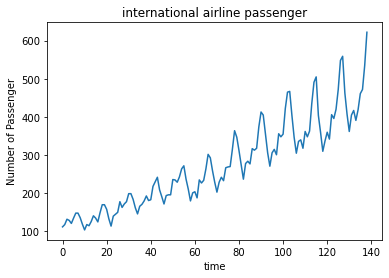

In [12]:
dataset = data.iloc[:,1].values
plt.plot(dataset)
plt.xlabel("time")
plt.ylabel("Number of Passenger")
plt.title("international airline passenger")
plt.show()

<a id="42"></a>
### Preprocessing Data

In [13]:
#reshape
dataset = dataset.reshape(-1,1)
dataset = dataset.astype("float32")
dataset.shape

(139, 1)

In [14]:
# scaling 
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [15]:
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [16]:
def split_data(X, y, test_size):
    pos = int(round(len(X) * (1-test_size)))
    X_train, y_train = X[:pos], y[:pos]
    X_test, y_test = X[pos:], y[pos:]
    return X_train, y_train, X_test, y_test

In [17]:
look_back = 1
X, y = create_dataset(dataset, look_back)
print("X:{},y:{}".format(X.shape, y.shape))
X_train, y_train, X_test, y_test = split_data(X, y, 0.33)
print("X_train:{},y_train:{},X_test:{},y_test{}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X:(137, 1),y:(137,)
X_train:(92, 1),y_train:(92,),X_test:(45, 1),y_test(45,)


In [18]:
#reshape
y = y.reshape(-1,1)
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)
print("X_train:{},y_train:{},X_test:{},y_test{}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train:(92, 1),y_train:(92, 1),X_test:(45, 1),y_test(45, 1)


In [19]:
# reshape input to be [samples, time steps, features]

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

<a id="43"></a>
### Create LSTM Model

In [20]:
# model
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=50, batch_size=1)

Epoch 1/50
92/92 [==============================] - 2s 1ms/step - loss: 0.0649
Epoch 2/50
92/92 [==============================] - 0s 1ms/step - loss: 0.0313
Epoch 3/50
92/92 [==============================] - 0s 1ms/step - loss: 0.0329
Epoch 4/50
92/92 [==============================] - 0s 1ms/step - loss: 0.0177
Epoch 5/50
92/92 [==============================] - 0s 1ms/step - loss: 0.0162
Epoch 6/50
92/92 [==============================] - 0s 1ms/step - loss: 0.0181
Epoch 7/50
92/92 [==============================] - 0s 1ms/step - loss: 0.0159
Epoch 8/50
92/92 [==============================] - 0s 1ms/step - loss: 0.0126
Epoch 9/50
92/92 [==============================] - 0s 1ms/step - loss: 0.0145
Epoch 10/50
92/92 [==============================] - 0s 1ms/step - loss: 0.0190
Epoch 11/50
92/92 [==============================] - 0s 1ms/step - loss: 0.0134
Epoch 12/50
92/92 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 13/50
92/92 [==============================

<a id="44"></a>
### Predictions and Visualising LSTM Model

In [21]:
X_train = numpy.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = numpy.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

(92, 1, 1)
(92, 1)
(45, 1, 1)
(45, 1)


In [22]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(y_train)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(y_test)

In [23]:
trainY=trainY.reshape(1,-1)
testY = testY.reshape(1,-1)
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.64 RMSE
Test Score: 45.38 RMSE


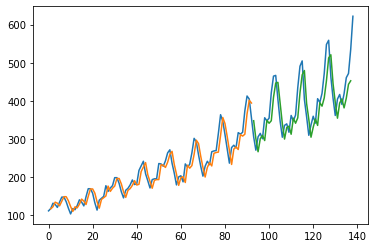

In [25]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back):len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## Выводы:
**На основе LSTM модели обучена нейронная сеть.**
